In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [193]:
df = pd.read_csv("train.csv")

In [194]:
#compute days neutropenic without FN 
#dummie FN after having 
#all string dates to datetime (so we can compute)
def dates(df,days_neutropenic_wo_fn,dummie_days_neutropenic_wo_fn):
    dates_columns = ["start_neutropenico","start_FN","birth_year"]
    for c in dates_columns:
        df[c] = pd.to_datetime(df[c],format='%YYYY-m%d')
    
    df[days_neutropenic_wo_fn] = df["start_FN"] - df["start_neutropenico"]
    
    #conver to integer
    df[days_neutropenic_wo_fn] = df[days_neutropenic_wo_fn].dt.days
    #dummie if patient got FN after few days of having neutropenic status
    df[dummie_days_neutropenic_wo_fn] = np.where(df[days_neutropenic_wo_fn]>0, 1, 0)
    return df

In [235]:
#PCA function: 
 #Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data


from sklearn.decomposition import PCA
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

#np_scaled = min_max_scaler.fit_transform(df)
def PCA_r(df,features,num_comp, resulting_features_names):
    # Separating out the features
    X = df.loc[:, features].values
    X = min_max_scaler.fit_transform(X)
    # Separating out the target
    y = df[['MDR']]

    pca = PCA(n_components=num_comp)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = [resulting_features_names[0], resulting_features_names[1]])
    finalDf = pd.concat([principalDf, y], axis = 1)
    return finalDf

features_diagnostic = ['dummy_others.LL',
    "dummy_Cancer.linfoproliferativo",
    "dummy_SMD",
    "dummy_Leucemia.cronica",
    "dummy_LAL",
    "dummy_EICH",
    "dummy_SMPC",
    "dummy_Cancer.solido",
    "dummy_LMC",
    "dummy_TLPT",
    "dummy_others.LM",
    "dummy_Mieloma.like",
    "dummy_LLC"]
resulting_features_names = ['PC1_DIAGNOSTIC', 'PC2_DIAGNOSTIC']
pc_diagnosis = PCA_r(df,features_diagnostic,2, resulting_features_names)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


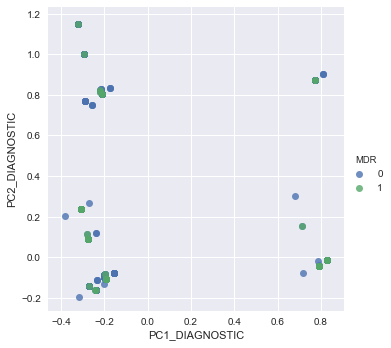

In [236]:
import seaborn as sns
sns.lmplot("PC1_DIAGNOSTIC", "PC2_DIAGNOSTIC", hue='MDR', data=pc_diagnosis, fit_reg=False)
plt.show()

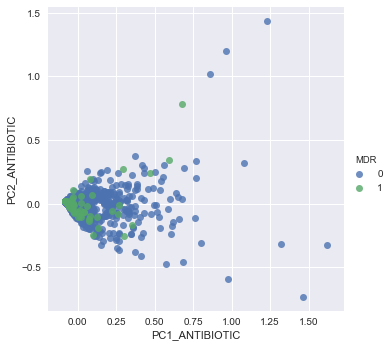

In [237]:
#FEATURES ANTIBIOTIC FOR PCA 
resulting_features_names = ['PC1_ANTIBIOTIC', 'PC2_ANTIBIOTIC']

features_antibiotic = ['AMIKACINA_.MG.',
'AMOXICILINA_.MG.',
'AMPICILINA_.MG.',
'AZITROMICINA_VIAL_.MG.',
'AZTREONAM_.MG.',
'CEFAZOLINA_.MG.',
'CEFIXIMA_.MG.',
'CEFOTAXIMA_.MG.',
'CEFOXITINA_.MG.',
'CEFTAROLINA_FOSAMIL_.MG.',
'CEFTAZIDIMA_.MG.',
'CEFTIBUTENO_.MG.',
'CEFTOLOZANO_.UND.',
'CEFTRIAXONA_.MG.',
'CEFUROXIMA.AXETILO_.MG.',
'CIPROFLOXACINO_.MG.',
'CLARITROMICINA_.MG.',
'CLINDAMICINA_.MG.',
'CLOXACILINA_.MG.',
'COTRIMOXAZOL_FORTE_.SULFAMETOXAZOL_.UND.',
'COTRIMOXAZOL.SULFAMETOXAZOL_.MG.',
'COTRIMOXAZOL.SULFAMETOXAZOL_.UND.',
'DAPTOMICINA_.MG.',
'DORIPENEM_.MG.',
'DOXICICLINA_.MG.',
'ERITROMICINA_.MG.',
'ERTAPENEM_.MG.',
'FOSFOMICINA_.MG.',
'GENTAMICINA_.MG.',
'IMIPENEM_.MG.',
'LEVOFLOXACINO_.MG.',
'LINEZOLID_.MG.',
'MEROPENEM_.MG.',
'METRONIDAZOL_.MG.',
'METRONIDAZOL_COMP_.MG.',
'MOXIFLOXACINO_.MG.',
'NORFLOXACINO_.MG.',
'PIPERACILINA_.MG.',
'RIFABUTINA_.MG.',
'RIFAMPICINA_.MG.',
'SULFADIAZINA_.MG.',
'TEICOPLANINA_.MG.',
'TIGECICLINA_.MG.',
'TOBRAMICINA_.MG.',
'TOBRAMICINA_NEB_.MG.',
'VANCOMICINA_.MG.']


#NORMALIZE DATA 


pc_antibiotics = PCA_r(df,features_antibiotic,2, resulting_features_names)
import seaborn as sns
sns.lmplot("PC1_ANTIBIOTIC", "PC2_ANTIBIOTIC", hue='MDR', data=pc_antibiotics, fit_reg=False)
plt.show()

In [ ]:
#P